<a href="https://colab.research.google.com/github/ZezinhoJesus/experimentosIA/blob/master/tratamento_tweets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preparação das bibliotecas

In [1]:
!pip install spacy --upgrade

     |████████████████████████████████| 10.0MB 2.6MB/s 
     |████████████████████████████████| 2.1MB 46.6MB/s 
  Found existing installation: thinc 7.4.0
    Uninstalling thinc-7.4.0:
      Successfully uninstalled thinc-7.4.0
  Found existing installation: spacy 2.2.4
    Uninstalling spacy-2.2.4:
      Successfully uninstalled spacy-2.2.4


In [18]:
import pandas as pd
import string
import spacy
import random
import seaborn as sns
import numpy as np
import re

In [3]:
!python3 -m spacy download pt

     |████████████████████████████████| 19.6MB 1.1MB/s 
  Created wheel for pt-core-news-sm: filename=pt_core_news_sm-2.3.0-cp36-none-any.whl size=19557499 sha256=59a2c1cb773becdbc511b631d619f52caf6a25a1145450d04b5e8b853ad71fd6
  Stored in directory: /tmp/pip-ephem-wheel-cache-uuh1u_ps/wheels/f6/43/f6/949b5e2b48df37aa3ed81fc3f4af4154afa276518cc004b990
Successfully built pt-core-news-sm
✔ Download and installation successful
You can now load the model via spacy.load('pt_core_news_sm')
✔ Linking successful
/usr/local/lib/python3.6/dist-packages/pt_core_news_sm -->
/usr/local/lib/python3.6/dist-packages/spacy/data/pt
You can now load the model via spacy.load('pt')


# Carregamento do Texto

In [11]:
#Importando a base de treinamento
b_treinamento = pd.read_csv('/content/Train50.csv', delimiter=';')
b_treinamento.shape

(50000, 5)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


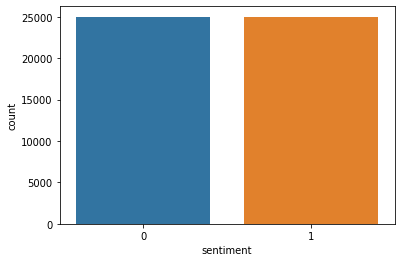

In [5]:
sns.countplot(b_treinamento['sentiment'], label='Contagem')

In [7]:
b_treinamento.head()

,id,tweet_text,tweet_date,sentiment,query_used
0,1050785521201541121,@Laranjito76 A pessoa certa para isso seria o ...,Fri Oct 12 16:29:25 +0000 2018,1,:)
1,1050785431955140608,"@behin_d_curtain Para mim, é precisamente o co...",Fri Oct 12 16:29:04 +0000 2018,1,:)
2,1050785401248645120,Vou fazer um video hoje... estou pensando em f...,Fri Oct 12 16:28:56 +0000 2018,1,:)
3,1050785370982547461,"aaaaaaaa amei tanto essas polaroids, nem sei e...",Fri Oct 12 16:28:49 +0000 2018,1,:)
4,1050785368902131713,Valoriza o coração do menininho que vc tem. El...,Fri Oct 12 16:28:49 +0000 2018,1,:)


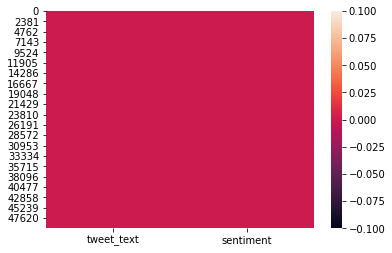

In [12]:
#Removendo colunas desnecessarias
b_treinamento.drop(['id', 'tweet_date', 'query_used'], axis=1, inplace=True)

sns.heatmap(pd.isnull(b_treinamento))

In [13]:
#Importando a base de teste
b_teste = pd.read_csv('/content/Test.csv', delimiter=';')
b_teste.shape

(5000, 5)

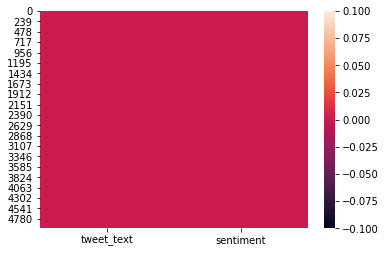

In [14]:
#Removendo colunas desnecessarias
b_teste.drop(['id', 'tweet_date', 'query_used'], axis=1, inplace=True)

sns.heatmap(pd.isnull(b_teste))

# Pre Processamento
Minúsculas, usuários, URLs, espaço, palavras desnecessárias, lematização, pontuação

In [19]:
pln = spacy.load('pt')
stop_words = spacy.lang.pt.stop_words.STOP_WORDS
pontuacoes = string.punctuation


In [20]:
def preprocessamento(texto):
  #minusculas
  texto = texto.lower()
  #usuario
  texto = re.sub(r"@[a-zA-Z0-9$-_@.&+]+", ' ',texto)
  #URL
  texto = re.sub(r"http?://[a-zA-Z0-9./]+", ' ',texto)
  #branco
  texto = re.sub(r" +", ' ',texto)
  #emoticons
  lista_emocoes = {':)':'emocaopositiva',
                   ':d':'emocaopositiva',
                   ':(':'emocaonegativa',
                   ':/':'emocaonegativa'}
  for emocao in lista_emocoes:
      texto = texto.replace(emocao,lista_emocoes[emocao])
  
  #lematizacao, pontuacao e stopwords
  
  doc = pln(texto)
  lista = []
  for token in doc:
    palavra = token.lemma_
    if palavra not in stop_words and palavra not in pontuacoes:
      lista.append(token.lemma_)

  lista = ' '.join([str(elemento) for elemento in lista])
  return lista

Tratando a base de dados

In [21]:
b_treinamento.head(5)

,tweet_text,sentiment
0,@Laranjito76 A pessoa certa para isso seria o ...,1
1,"@behin_d_curtain Para mim, é precisamente o co...",1
2,Vou fazer um video hoje... estou pensando em f...,1
3,"aaaaaaaa amei tanto essas polaroids, nem sei e...",1
4,Valoriza o coração do menininho que vc tem. El...,1


In [23]:
b_treinamento['tweet_text'] = b_treinamento['tweet_text'].apply(preprocessamento)

In [24]:
b_treinamento.head(5)

,tweet_text,sentiment
0,o pessoa certo parir seriar o valer e azeved...,1
1,parir mim precisamente o contrário emocaopos...,1
2,video hoje ... pensar falar sobrar o meter csg...,1
3,aaaaaaaa amar polaroids expressar o quantum to...,1
4,valorizar o coração menino vc diferente o sorr...,1


In [25]:
b_teste['tweet_text'] = b_teste['tweet_text'].apply(preprocessamento)

In [26]:
b_teste.head(5)

,tweet_text,sentiment
0,obrigar emocaopositiva,1
1,pa puta parir emocaopositiva,1
2,querer desconto 14/08 ⭐ ⭐ ⭐ ⭐ ⭐ 🌐 conferir o l...,1
3,vcs ajudar galera pelar amor butera emocaoposi...,1
4,casar zé e o morrer sono chegar o casar e fica...,1


Tratamento das classes

In [29]:
b_treinamento_final = []
for texto,emocao in zip(b_treinamento['tweet_text'],b_treinamento['sentiment']):
  if emocao == 1:
    dic = ({"POSITIVO":True, "NEGATIVO": False})
  elif emocao == 0:
    dic = ({"POSITIVO":False, "NEGATIVO": True})
  
  b_treinamento_final.append([texto,dic.copy()])

In [31]:
len(b_treinamento_final)

50000

# Criação do Modelo

In [32]:
modelo = spacy.blank('pt')
categorias = modelo.create_pipe("textcat")

categorias.add_label("POSITIVO")
categorias.add_label("NEGATIVO")
modelo.add_pipe(categorias)
historico = []
#modelo contem uma rede neural convolucional

# Treinamento

In [33]:
modelo.begin_training()
for epoca in range(3):
  random.shuffle(b_treinamento_final) #embaralhamento
  losses = {} #controle do erro
  for batch in spacy.util.minibatch(b_treinamento_final, 500):
    textos = [modelo(texto) for texto,entities in batch]
    annotations = [{'cats':entities} for texto,entities in batch]
    modelo.update(textos,annotations,losses=losses)
  if epoca % 5 == 0:
    print (losses)
    historico.append(losses)

{'textcat': 8.603048801486546e-06}


In [34]:
historico_loss = []
for i in historico:
    historico_loss.append(i.get('textcat'))
  
historico_loss = np.array(historico_loss)


Text(0, 0.5, 'Erro')

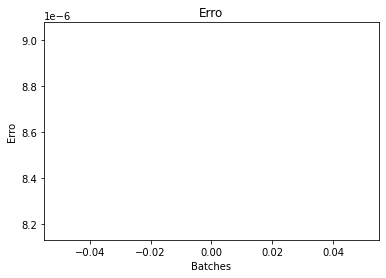

In [35]:
import matplotlib.pyplot as plt

plt.plot(historico_loss)
plt.title('Erro')
plt.xlabel('Batches')
plt.ylabel('Erro')

Salvando modelo

In [36]:
modelo.to_disk("modelo")

# Execução e avaliação

In [37]:
modelo_carregado = spacy.load("modelo")

Testando uma entrada

In [40]:
tweet = b_teste['tweet_text'][21]
print(tweet)
previsao = modelo_carregado(tweet)
print(previsao)
print(previsao.cats)

  ficar feliz q recíproco emocaopositiva
  ficar feliz q recíproco emocaopositiva
{'POSITIVO': 0.9999545812606812, 'NEGATIVO': 0.0007463653455488384}


Avaliação do modelo

In [50]:
previsoes = []
for texto in b_teste['tweet_text']:
  previsao = modelo_carregado(texto)
  previsoes.append(previsao.cats)

previsoes_final = []
for previsao in previsoes:
  if previsao['POSITIVO'] > previsao['NEGATIVO']:
    previsoes_final.append(1)
  else:
    previsoes_final.append(0)

previsoes_final = np.array(previsoes_final)

In [51]:
respostas_reais = b_teste['sentiment'].values

In [52]:
from sklearn.metrics import confusion_matrix, accuracy_score

score = accuracy_score(respostas_reais, previsoes_final)
print(score)

0.9972


In [53]:
cmatrix = confusion_matrix(respostas_reais, previsoes_final)
cmatrix

array([[2494,    6],
       [   8, 2492]])

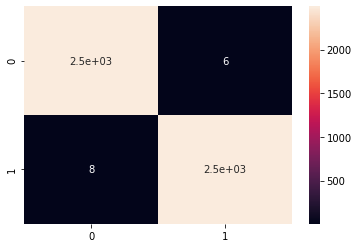

In [55]:
sns.heatmap(cmatrix, annot=True)